<a href="https://colab.research.google.com/github/Sliders122/DSTI_ANN/blob/main/boston_housing_regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <span id="1"></span>  1. Overview 

Columns:
- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq. ft
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS :** Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric oxide concentration (parts per 10 million)
- **RM:** Average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built prior to 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **PTRATIO:** Pupil-teacher ratio by town
- **B:** 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- **LSTAT:** Percentage of lower status of the population
- **Price:** Median value (Price) of owner-occupied homes in $1000s

## <span id="2"></span> 2. Importing Libraries and Exploring the Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [ ]:
boston_dataset = load_boston() #selling price of a given house in the Boston (MA) area
print('data is : {}'.format(boston_dataset.data))
print('independent variable names are : {}'.format(boston_dataset.feature_names))
print('labels or prices : {}'.format(boston_dataset.target))

dataset = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

data is : [[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
independent variable names are : ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
labels or prices : [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
np.shape(boston_dataset.data) # shape of the dataset

(506, 13)

In [ ]:
dataset.head()   #show the first 10 rows of data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
dataset.tail(n=10)   #show the last 10 rows of data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


As you seen, there isn't "``Price``" column that we will try to predict. Let's add the column to our dataset.

In [ ]:
dataset['Price'] = boston_dataset.target

In [ ]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Use the describe() method to understand the data
dataset.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## <span id="3"></span> 3. Data Analysis

### <span id="4"></span> Data Preprocessing

Are there missing values? There isn't any missing values as shown below.

In [ ]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [ ]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values.reshape(-1,1)
#reshape: frist argument -1 ask numpy to figue out how many rows it should put and 1 for the seconde argument define 1 column

# Alternative:
'''
X = dataset.loc[:, df.columns != 'Price']
y = dataset.loc[:, df.columns == 'Price']
'''

"\nX = dataset.loc[:, df.columns != 'Price']\ny = dataset.loc[:, df.columns == 'Price']\n"

In [ ]:
type(y)

numpy.ndarray

In [ ]:
print(X.shape)
print(y.shape)

(506, 13)
(506, 1)


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [ ]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (354, 13)
Shape of X_test:  (152, 13)
Shape of y_train:  (354, 1)
Shape of y_test (152, 1)


### <span id="5"></span> Visualizing Data

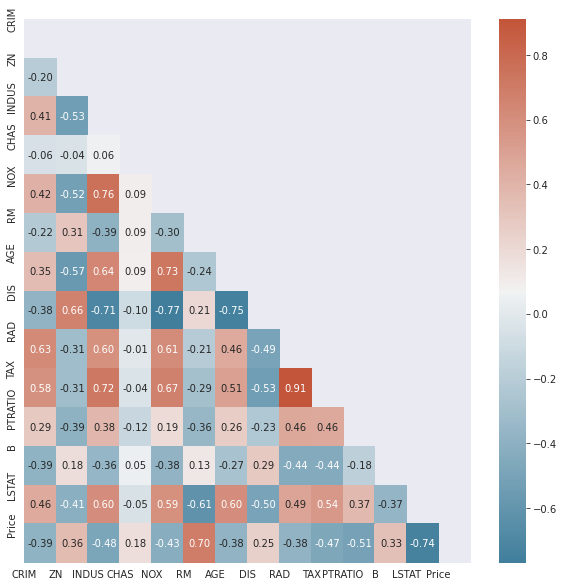

In [ ]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, mask = mask, cmap=cmap, annot=True, fmt=".2f")
#sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

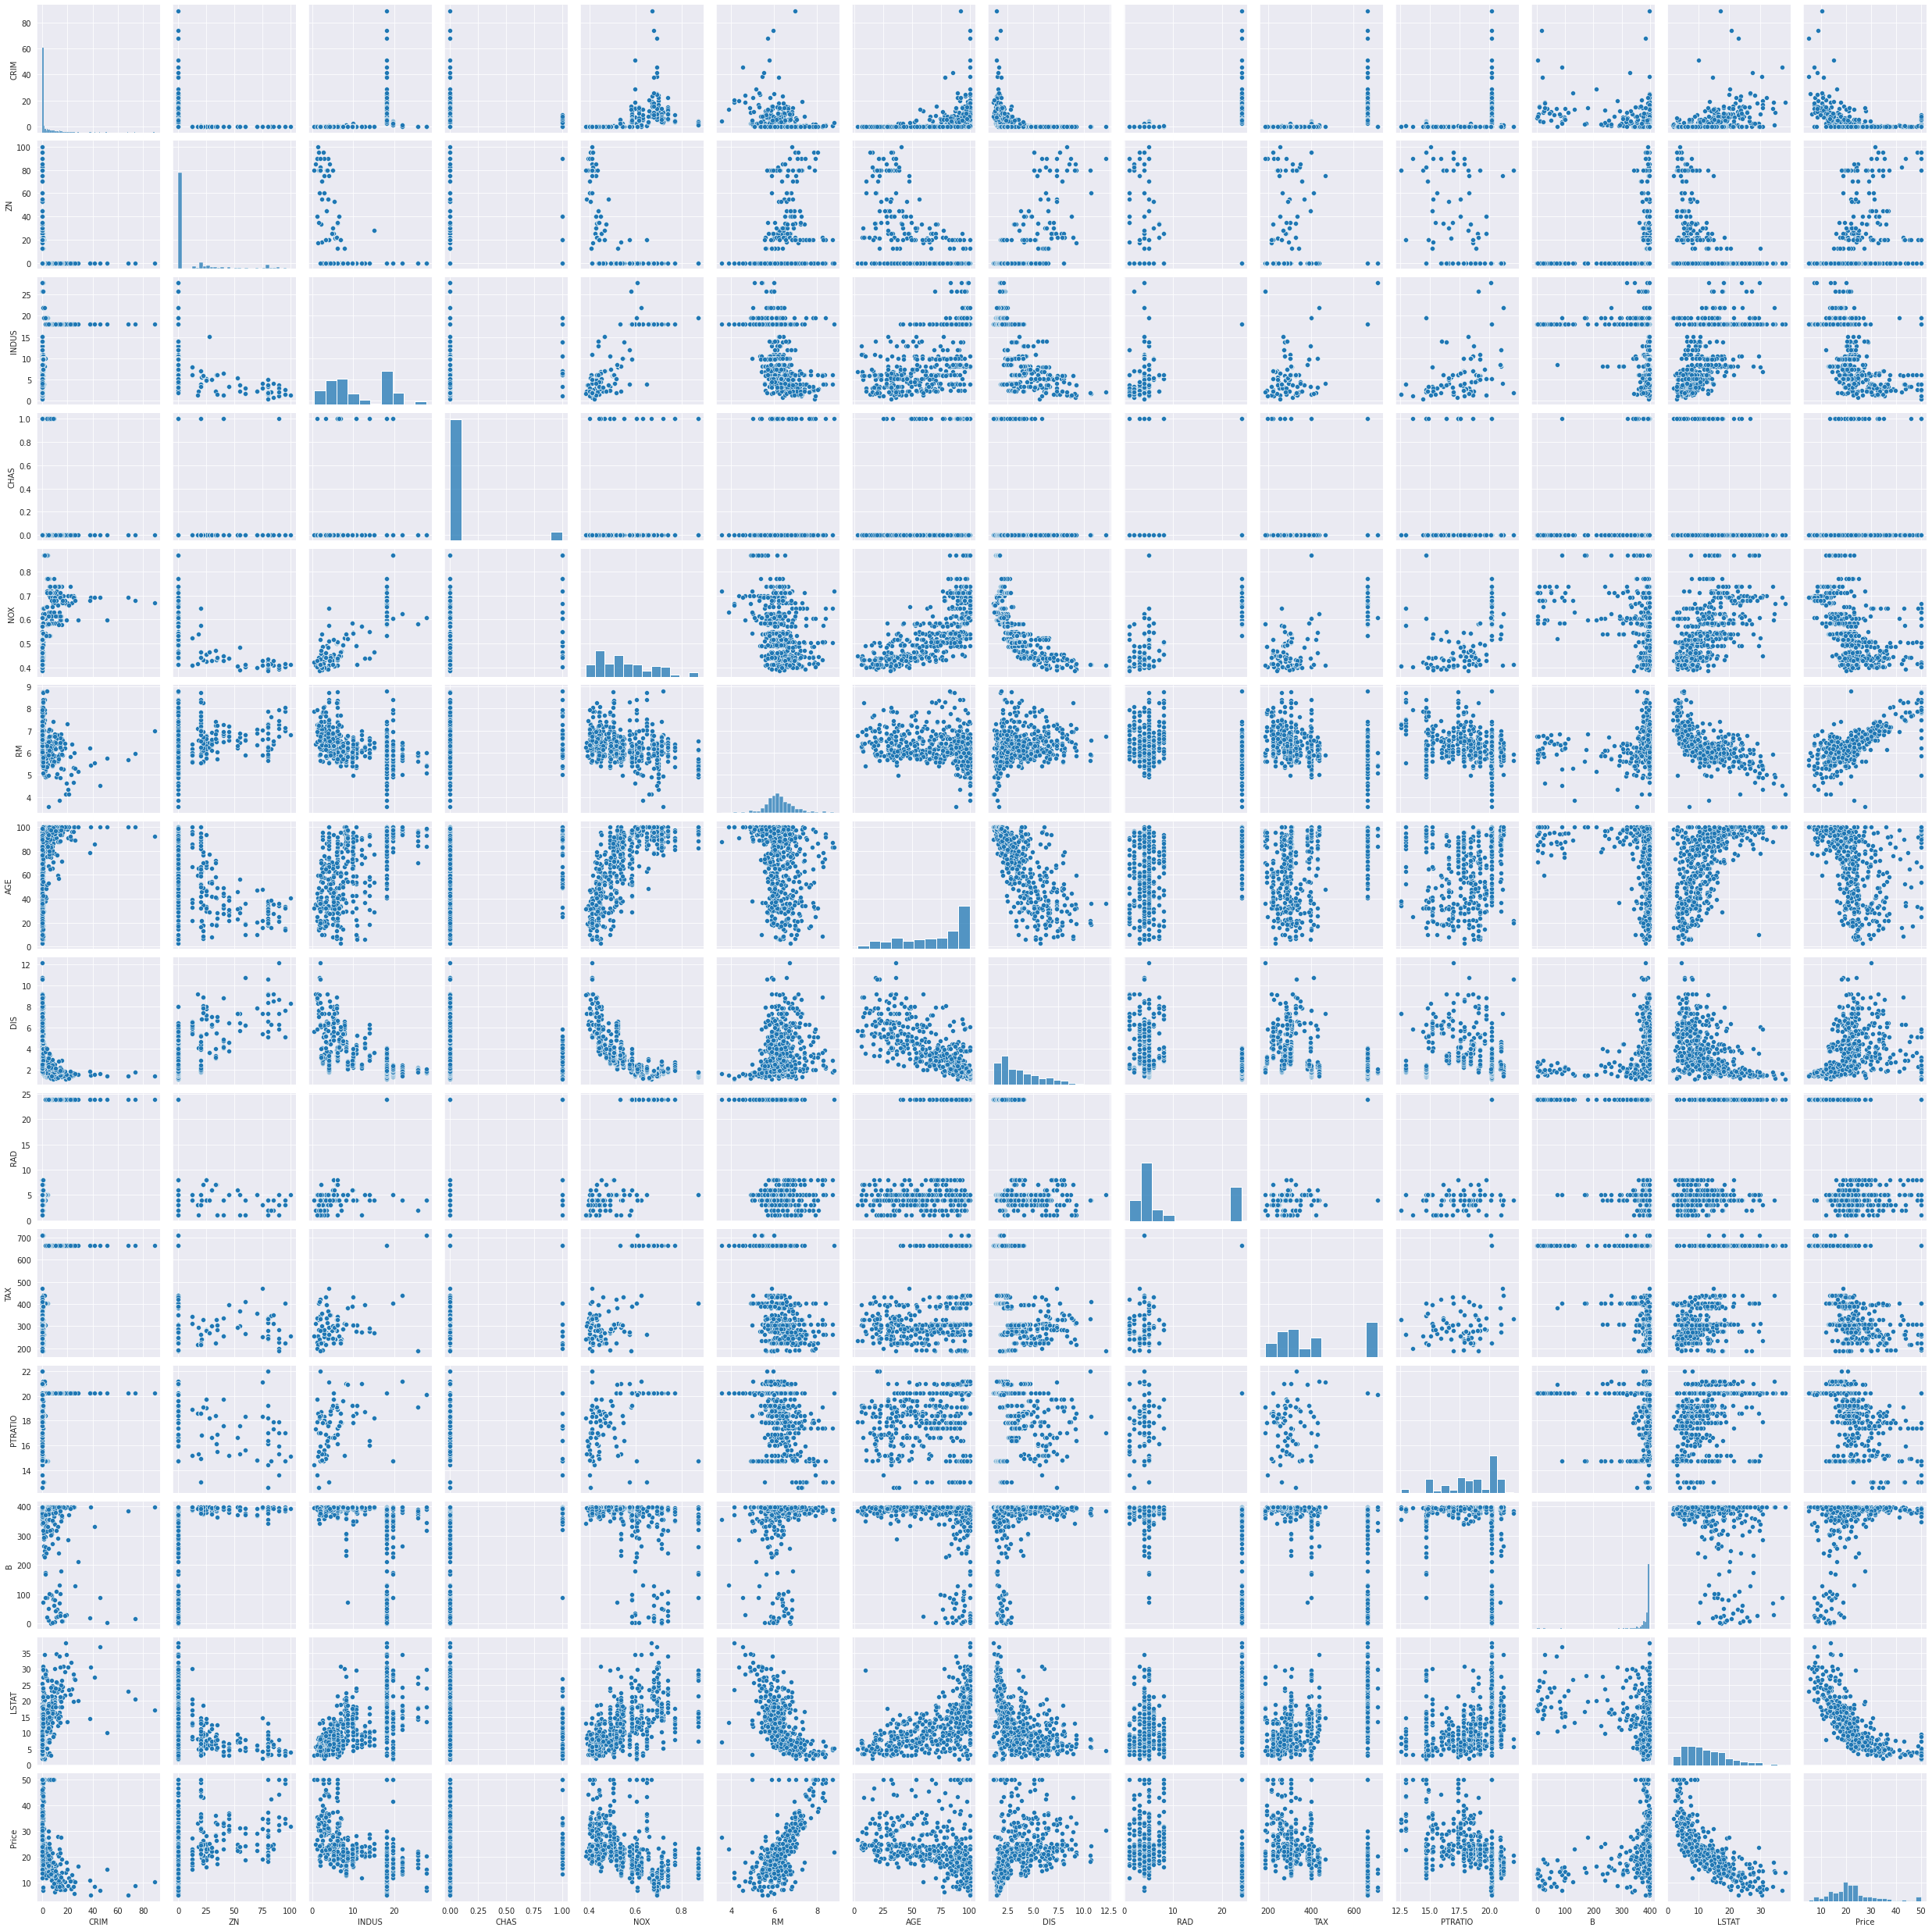

In [ ]:
sns.pairplot(dataset)
plt.show()

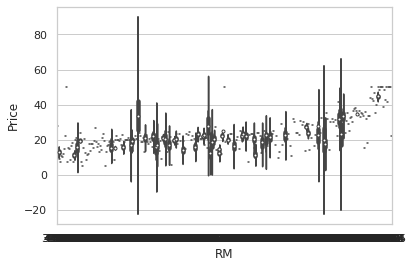

In [ ]:
sns.set_theme(style="whitegrid")

ax = sns.violinplot(y=dataset["Price"], x=dataset["RM"], data=dataset)

## <span id="6"></span> 4. Regression Models

### <span id="7"></span> Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# Predicting Cross Validation Score
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = kfold)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.6758632610042049
R2_score (train):  0.7435787589010061
R2_score (test):  0.7133593313710349
RMSE:  4.647279745724213


### <span id="8"></span> Polynomial Regression - 2nd degree

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# Predicting Cross Validation Score
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = kfold)

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.6758632610042049
R2_score (train):  0.9306558488538952
R2_score (test):  0.7665134369006885
RMSE:  4.19431320754161


### <span id="9"></span> Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=3.8))])

In [ ]:
from sklearn.metrics import r2_score

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# Predicting Cross Validation Score
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train.ravel(), cv = kfold)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.742816128235247
R2_score (train):  0.9228176586388414
R2_score (test):  0.891965455298589
RMSE:  2.853062166443758


### <span id="10"></span> Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.012, fit_intercept=True, max_iter=3000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.012, max_iter=3000))])

In [ ]:
from sklearn.metrics import r2_score

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# Predicting Cross Validation Score
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = y_train, cv = kfold)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.7244704450034092
R2_score (train):  0.9234017201921203
R2_score (test):  0.8950938075525039
RMSE:  2.8114507112289018


### <span id="11"></span> Artificial Neural Network

In [ ]:
# Standardization
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train_sd = (X_train - mean) / std
X_test_sd = (X_test - mean) / std

In [ ]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (354, 13)
Shape of X_test:  (152, 13)
Shape of y_train:  (354, 1)
Shape of y_test (152, 1)


In [ ]:
# Defining the ANN model
from keras.models import Sequential
from keras.layers import Dense

# Create function returning a compiled network
def create_network():
  model = Sequential()
  model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_layer_1'))
  model.add(Dense(64, activation='relu', name='dense_layer_2'))
  model.add(Dense(1, activation='linear', name='dense_output'))
  model.compile(optimizer='adam', loss='mse')
  model.summary()

  # Return compiled network
  return model

In [ ]:
# Fitting the ANN Model to the dataset 
from keras.wrappers.scikit_learn import KerasRegressor
# Wrap Keras model so it can be used by scikit-learn
regressor_ann = KerasRegressor(build_fn=create_network, 
                                 epochs=200, 
                                 batch_size=8, 
                                 verbose=1)
regressor_ann.fit(X_train_sd, y_train)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  import sys


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer_1 (Dense)       (None, 128)               1792      
                                                                 
 dense_layer_2 (Dense)       (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
45/45 [==============================] - 3s 2ms/step - loss: 471.5581
Epoch 2/200
45/45 [==============================] - 0s 2ms/step - loss: 121.5329
Epoch 3/200
45/45 [==============================] - 0s 3ms/step - loss: 35.4715
Epoch 4/200
45/45 [==============================] - 0s 2ms/step - loss

In [ ]:
from sklearn.metrics import r2_score

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# Predicting Cross Validation Score
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cv_ann = cross_val_score(regressor_ann, X_train_sd, y_train, cv=kfold, n_jobs=1, verbose=0) # bug here : sklearn has changed their API to invert their cost functions.


# Predicting R2 Score the Train set results
y_pred_ann_train = regressor_ann.predict(X_train_sd)
r2_score_ann_train = r2_score(y_train, y_pred_ann_train)

# Predicting R2 Score the Test set results
y_pred_ann_test = regressor_ann.predict(X_test_sd)
r2_score_ann_test = r2_score(y_test, y_pred_ann_test)

# Predicting RMSE the Test set results
rmse_ann = (np.sqrt(mean_squared_error(y_test, y_pred_ann_test)))
print('CV: ', cv_ann.mean())
print('R2_score (train): ', r2_score_ann_train)
print('R2_score (test): ', r2_score_ann_test)
print("RMSE: ", rmse_ann)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer_1 (Dense)       (None, 128)               1792      
                                                                 
 dense_layer_2 (Dense)       (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
40/40 [==============================] - 0s 2ms/step - loss: 487.1318
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 164.7684
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 42.3742
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - lo

In [ ]:
print("Results: %.2f (%.2f) MSE" % (cv_ann.mean(), cv_ann.std()))

Results: -15.21 (10.08) MSE


### <span id="12"></span>  Decision Tree Regression 

In [ ]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
from sklearn.metrics import r2_score

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# Predicting Cross Validation Score
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = kfold)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.6404681874506504
R2_score (train):  1.0
R2_score (test):  0.5989917396644069
RMSE:  5.496757417356451


### <span id="13"></span> Random Forest Regression

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X_train)
y_scaled = sc_y.fit_transform(y_train.reshape(-1,1))

In [ ]:
# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor_rf.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=500, random_state=0)

In [ ]:
from sklearn.metrics import r2_score

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# Predicting Cross Validation Score
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cv_rf = cross_val_score(estimator = regressor_rf, X = X_scaled, y = y_train.ravel(), cv = kfold)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.785086730763821
R2_score (train):  0.9768407108850092
R2_score (test):  0.8637486208767902
RMSE:  3.204057971213175


## <span id="14"></span> 5. Measuring the Error

In [ ]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Polynomial Regression (2nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_poly2.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
          ('Artificial Neural Network', rmse_ann, r2_score_ann_train, r2_score_ann_test, cv_ann.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,4.647280,0.743579,0.713359,0.675863
1,Polynomial Regression (2nd),4.194313,0.930656,0.766513,0.675863
2,Ridge Regression,2.853062,0.922818,0.891965,0.742816
3,Lasso Regression,2.811451,0.923402,0.895094,0.724470
4,Artificial Neural Network,3.102596,0.984360,0.872241,-15.438615
5,Decision Tree Regression,5.496757,1.000000,0.598992,0.640468
6,Random Forest Regression,3.204058,0.976841,0.863749,0.785087


### <span id="15"></span> Visualizing Model Performance

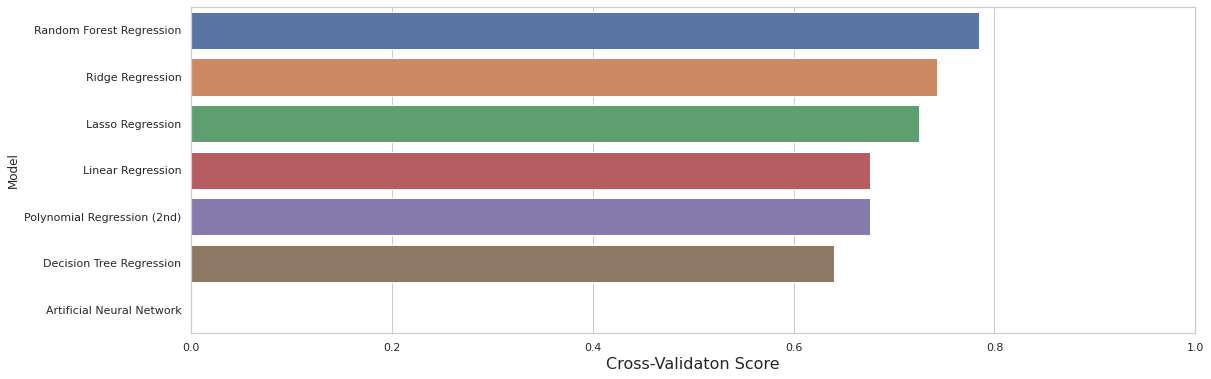

In [ ]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

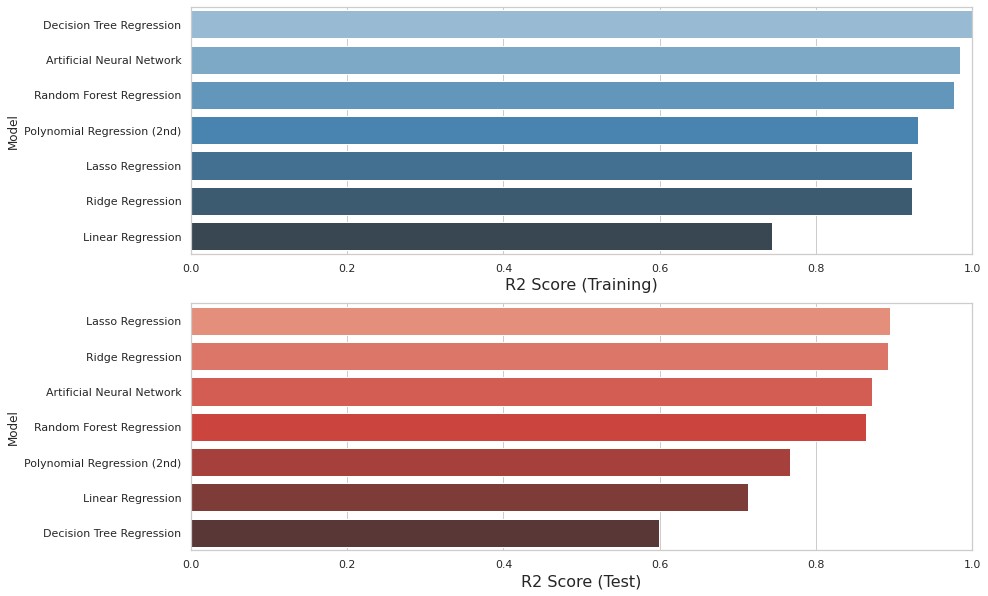

In [ ]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()

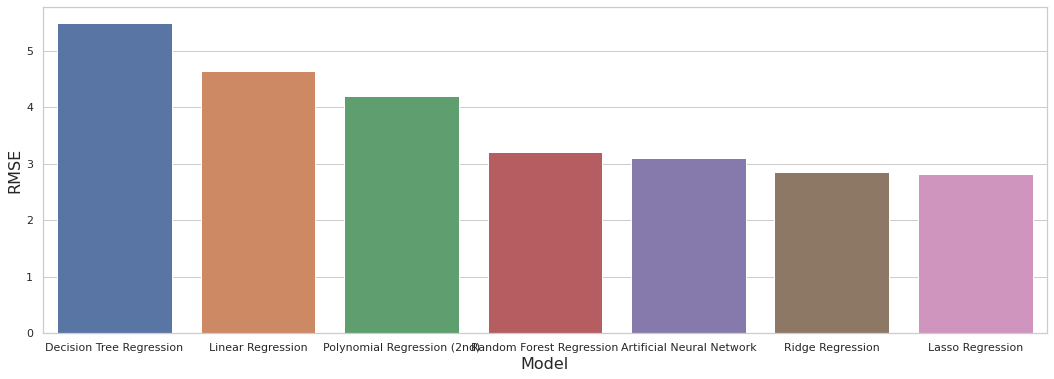

In [ ]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()

## <span id="16"></span> 6. Conclusion

In this project, we have built 7 regression models using Boston Housing Dataset. These are :
 
* Linear, 
* Polynomial, 
* Ridge, 
* Lasso,  
* ANN, 
* Decision tree, 
* Random forest regression. 

Then measured and visualized the performance of the models. 

## <span id="16"></span> 7. Bonus

In [ ]:
new_dataset = dataset.copy()

In [ ]:
new_dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [ ]:
for col in ['ZN', 'NOX', 'RAD', 'PTRATIO', 'B']:
    del new_dataset[col]

In [ ]:
cols = ['RM', 'AGE', 'TAX', 'LSTAT', 'Price']

In [ ]:
new_dataset[cols].corr()

,RM,AGE,TAX,LSTAT,Price
RM,1.000000,-0.240265,-0.292048,-0.613808,0.695360
AGE,-0.240265,1.000000,0.506456,0.602339,-0.376955
TAX,-0.292048,0.506456,1.000000,0.543993,-0.468536
LSTAT,-0.613808,0.602339,0.543993,1.000000,-0.737663
Price,0.695360,-0.376955,-0.468536,-0.737663,1.000000


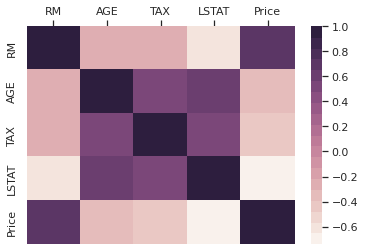

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
ax = sns.heatmap(new_dataset[cols].corr(),
                 cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15))
ax.xaxis.tick_top() # move labels to the top


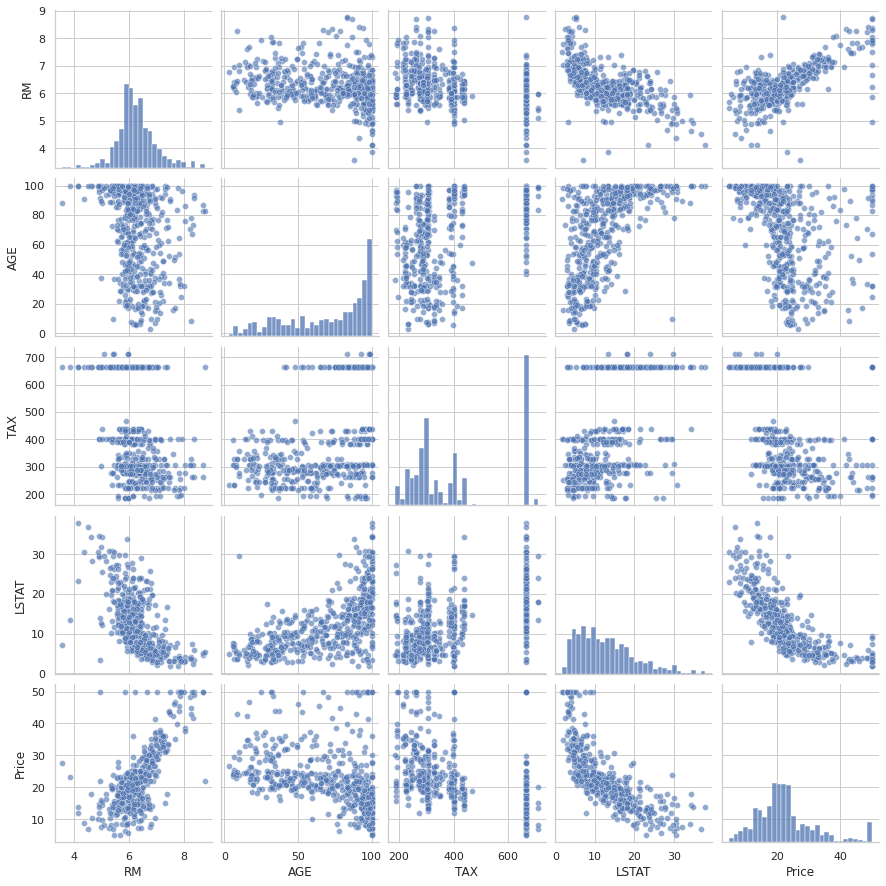

In [ ]:
sns.pairplot(new_dataset[cols], 
             plot_kws={'alpha': 0.6},
             diag_kws={'bins': 30})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


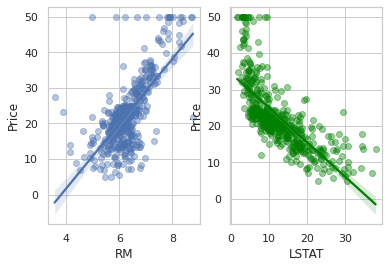

In [ ]:
fig, ax = plt.subplots(1, 2)
sns.regplot('RM', 'Price', new_dataset, ax=ax[0], scatter_kws={'alpha': 0.4})
sns.regplot('LSTAT', 'Price', new_dataset, ax=ax[1], scatter_kws={'alpha': 0.4}, color='green')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def get_mse(new_dataset, feature, target='Price'):
    # Get x, y to model
    y = new_dataset[target].values
    x = new_dataset[feature].values.reshape(-1,1)
    print('{} ~ {}'.format(target, feature))
    
    # Build and fit the model
    lm = LinearRegression()
    lm.fit(x, y)
    msg = 'model: y = {:.3f} + {:.3f}x'\
            .format(lm.intercept_, lm.coef_[0])
    print(msg)
    
    # Predict and determine MSE
    y_pred = lm.predict(x)
    error = mean_squared_error(y, y_pred)
    print('mse = {:.2f}'.format(error))
    print()

In [ ]:
get_mse(new_dataset, 'RM')
get_mse(new_dataset, 'LSTAT')

Price ~ RM
model: y = -34.671 + 9.102x
mse = 43.60

Price ~ LSTAT
model: y = 34.554 + -0.950x
mse = 38.48



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


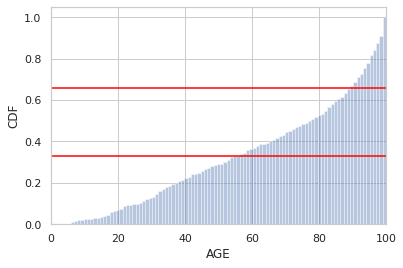

In [ ]:
sns.distplot(new_dataset.AGE.values, bins=100,
			hist_kws={'cumulative': True},
			kde_kws={'lw': 0})
plt.xlabel('AGE')
plt.ylabel('CDF')
plt.axhline(0.33, color='red')
plt.axhline(0.66, color='red')
plt.xlim(0, new_dataset.AGE.max());

In [ ]:
def get_age_category(x):
	if x < 50:
		return 'Relatively New'
	elif 50 <= x < 85:
		return 'Relatively Old'
	else:
	  return 'Very Old'
    
new_dataset['AGE_category'] = new_dataset.AGE.apply(get_age_category)

In [ ]:
new_dataset.groupby('AGE_category').size()

AGE_category
Relatively New    147
Relatively Old    149
Very Old          210
dtype: int64

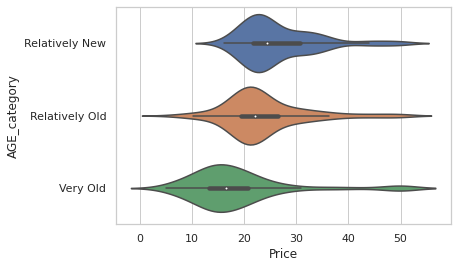

In [ ]:
sns.violinplot(x='Price', y='AGE_category', data=new_dataset,
				order=['Relatively New', 'Relatively Old', 'Very Old'])